In [2]:
# Importing lib for my Iris datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Fetching the data that has been downloaded from Kaggle
df = pd.read_csv(r'C:\Users\PC\OneDrive\Music\Documents\week 3 assignments plp/Iris.csv')
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [5]:
# Handling Missing Values
df.fillna(df.mean(numeric_only = True), inplace=True) 

In [6]:
# Dropping the unwanted column
df.drop(columns=['Id'], inplace=True, errors='ignore') 

In [7]:
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [8]:
# Encode species labels
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

In [9]:
# Split into features (X) and target (y)
X = df.drop('Species', axis=1)
y = df['Species']



 Iris Species Classification Results 
Accuracy:  1.00
Precision: 1.00
Recall:    1.00


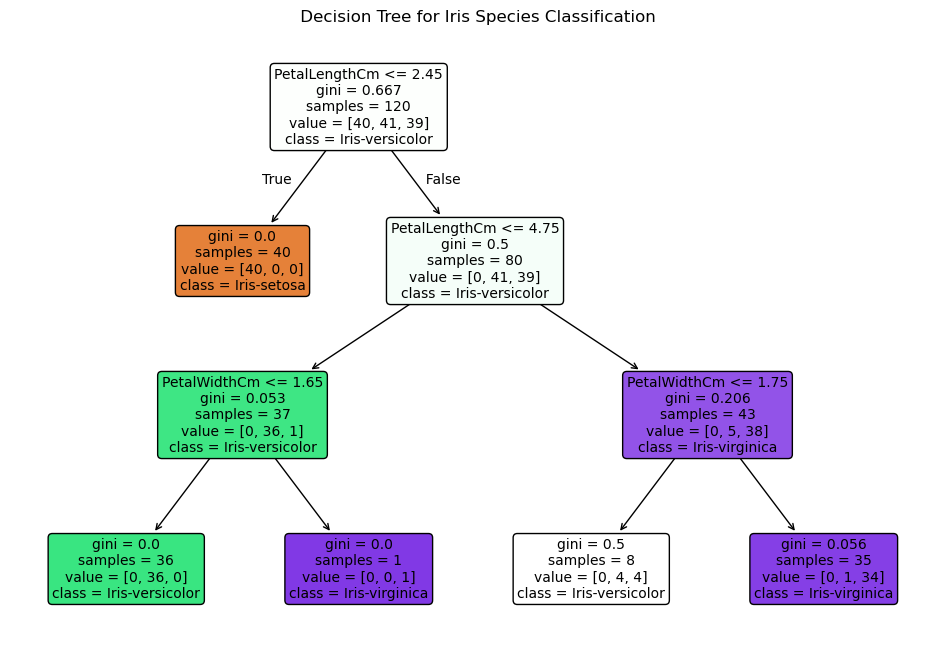

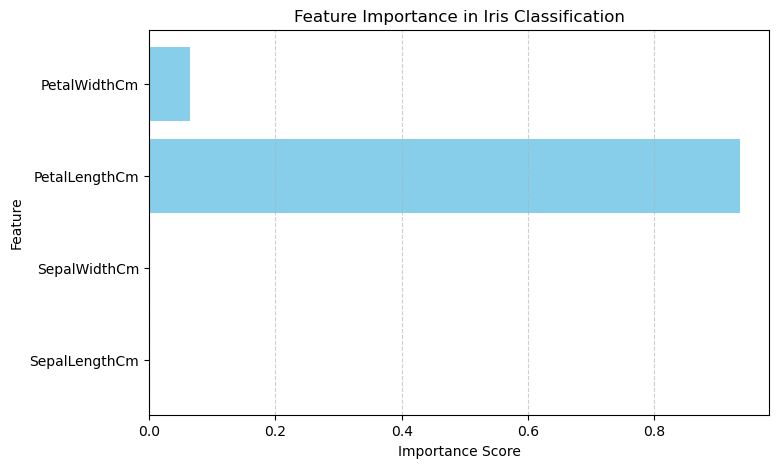

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("\n Iris Species Classification Results ")
print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")

# --- Visualization 1: Decision Tree ---
plt.figure(figsize=(12, 8))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=label_encoder.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title(" Decision Tree for Iris Species Classification")
plt.show()

# --- Visualization 2: Feature Importance ---
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
plt.barh(features, importances, color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Iris Classification")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()